# Statistic Analysis for the Relationship between Moderation & User Engagement


In [1]:
from matplotlib.pyplot import ylabel
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from utils.SocialMediaDataset_Sa import MastodonDataset, RedditDataset
from utils.statistic_analysis import *
from scipy.stats import zscore


Device set to use cpu


## 1. Data Preprocessing

In [3]:
mastodon = MastodonDataset(keep_common_col_only = False)
reddit = RedditDataset(keep_common_col_only = False)
mastodon.clean()
reddit.clean()


Starting data cleaning process... 🧹🧼
Cleaning column: source_url
Cleaning column: description
Cleaning column: active_month
Cleaning column: languages
Cleaning column: rules
Cleaning column: top_5_trends
Cleaning column: total_users
Cleaning column: total_posts
Cleaning column: blacklist
Data is all clean and shiny! ✨🫧

Starting data cleaning process... 🧹🧼
Cleaning column: description
Cleaning column: languages
Cleaning column: total_users
Cleaning column: active_month
Cleaning column: over18
Cleaning column: quarantine
Cleaning column: is_restricted
Cleaning column: moderators_count
Cleaning column: rules
Data is all clean and shiny! ✨🫧


In [4]:
df_mastodon = mastodon.df
df_mastodon['rules_num']=df_mastodon['rules'].apply(len)
df_mastodon.head(5)

,domain,title,source_url,description,active_month,languages,rules,top_5_trends,total_users,total_posts,blacklist,server_id,rules_num
0,mastodon.social,Mastodon,https://github.com/mastodon/mastodon,The original server operated by the Mastodon g...,327503,[en],"[{'id': '1', 'text': 'Sexually explicit or vio...",[],2711879,129725014,366,0,6
1,mstdn.social,Mastodon 🐘,https://github.com/mastodon/mastodon,A general-purpose Mastodon server with a 500 c...,14546,[en],"[{'id': '2', 'text': 'Sexually explicit or vio...",[],260323,19904208,300,1,8
2,infosec.exchange,Infosec Exchange,https://github.com/glitch-soc/mastodon,A Mastodon instance for info/cyber security-mi...,13319,[en],"[{'id': '1', 'text': 'Do unto others as you th...",[],75725,4296664,503,2,14
3,mas.to,mas.to,https://github.com/mastodon/mastodon,"Hello! mas.to is a fast, up-to-date and fun Ma...",11889,[en],"[{'id': '9', 'text': 'No discrimination, inclu...",[],183608,10834206,544,3,9
4,mastodon.world,Mastodon,https://github.com/mastodon/mastodon,Generic Mastodon server for anyone to use.,9472,[en],"[{'id': '16', 'text': 'No illegal content, e.g...",[],191710,7158644,1,4,18


## 2. Statistic Analysis of Mastodon
### 2.1 Distribution Analysis

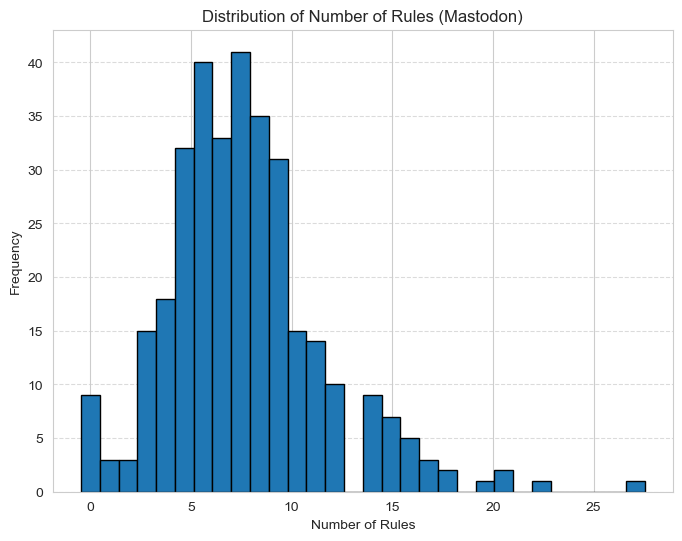

In [5]:
plot_distribution(df_mastodon['rules_num'],'Number of Rules','Frequency','Distribution of Number of Rules (Mastodon)', df_mastodon['rules_num'].max()+2)

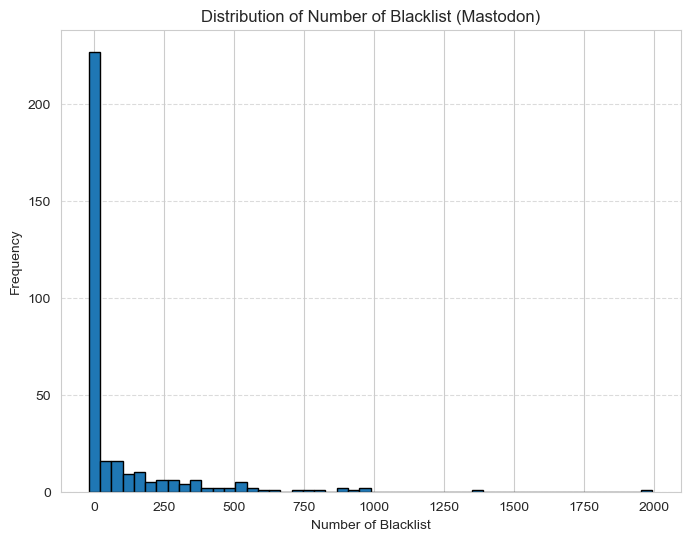

In [6]:
plot_distribution(df_mastodon['blacklist'],'Number of Blacklist','Frequency','Distribution of Number of Blacklist (Mastodon)', 50)

### 2.2 Correlation Analysis

In [7]:
df_strictness_ma=pd.read_csv("mastodon_server_strictness.csv")
df_mastodon=df_mastodon.merge(df_strictness_ma[['domain','strictness']],how='inner',on='domain')

In [8]:
df_mastodon['active_rate']=df_mastodon['active_month']/df_mastodon['total_users']
idx_max = df_mastodon['active_month'].idxmax()
df_re_mastodon = df_mastodon.drop(idx_max).copy()

In [9]:
print(df_re_mastodon.shape)

(196, 15)


--------rules_num,active_rate---------
Pearson correlation coefficient: 0.02337549747856373
P-value: 0.745023531626396
Spearmanr correlation coefficient: 0.04861036928263164
P-value: 0.4986646673653786
Kendall-tau correlation coefficient: 0.033643199433594374
P-value: 0.5023676439516082


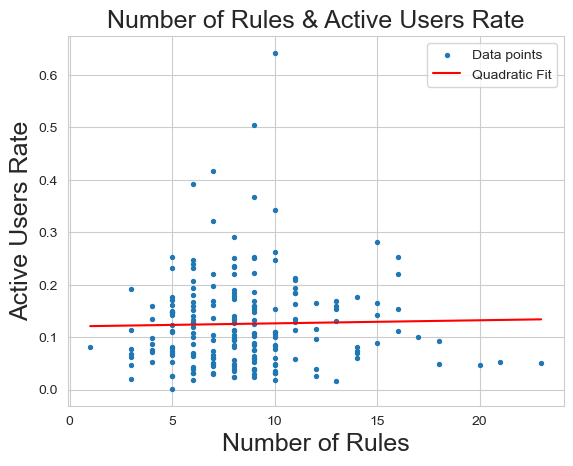

r2=0.0005464138823702003
--------strictness,active_rate---------
Pearson correlation coefficient: 0.03313408403475472
P-value: 0.6447722852992348
Spearmanr correlation coefficient: 0.07723821497492528
P-value: 0.2819153066461322
Kendall-tau correlation coefficient: 0.049920801138428
P-value: 0.30356395726266694


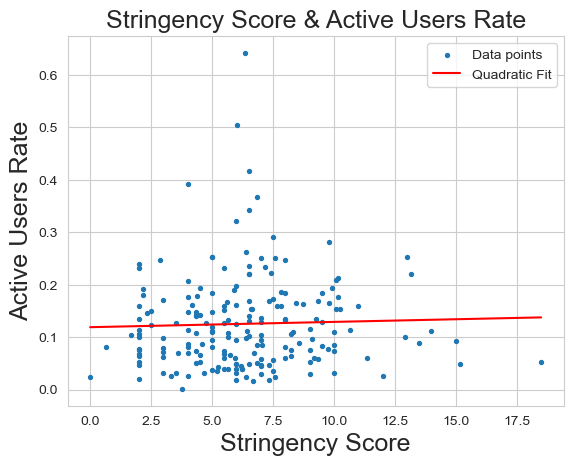

r2=0.0010978675248222158
--------blacklist,active_rate---------
Pearson correlation coefficient: 0.022406975645006513
P-value: 0.7552455089182153
Spearmanr correlation coefficient: 0.0002912482394744756
P-value: 0.996767463770331
Kendall-tau correlation coefficient: -0.0024347145614520838
P-value: 0.9634907314107406


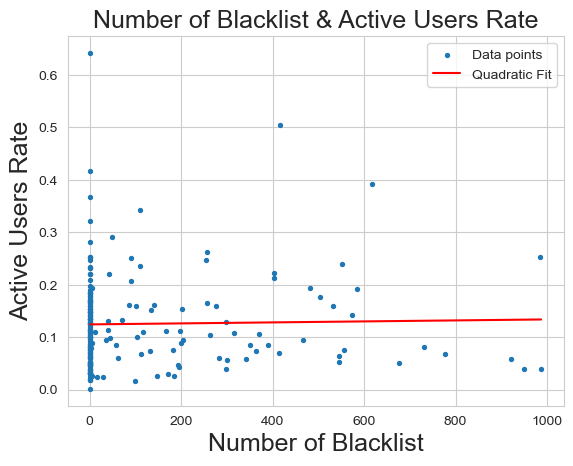

r2=0.0005020725575557439
--------rules_num,total_users---------
Pearson correlation coefficient: 0.1117885771207473
P-value: 0.11877808428791195
Spearmanr correlation coefficient: 0.09647419506840087
P-value: 0.17858023981550572
Kendall-tau correlation coefficient: 0.06932763916627996
P-value: 0.1669426067422073


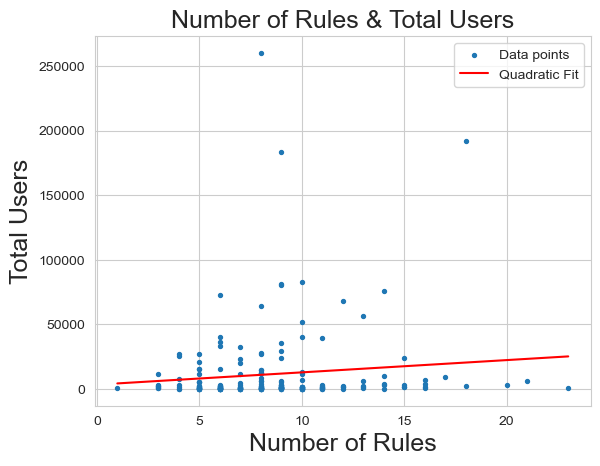

r2=0.012496685974681232
--------strictness,total_users---------
Pearson correlation coefficient: 0.16967664135515437
P-value: 0.01742834228681549
Spearmanr correlation coefficient: 0.08872980075018617
P-value: 0.21619388912732032
Kendall-tau correlation coefficient: 0.06240753316549524
P-value: 0.19843282816425112


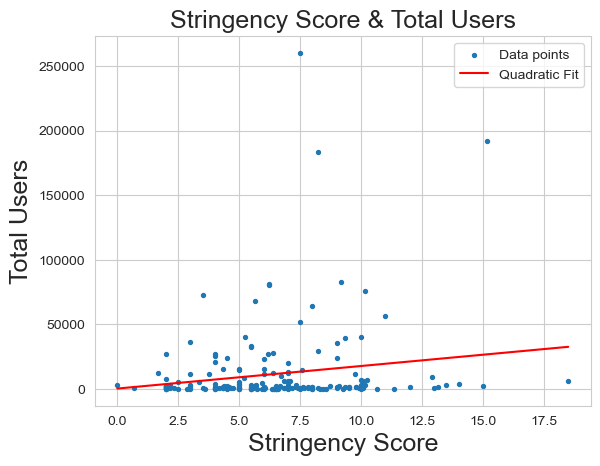

r2=0.02879016262156564
--------blacklist,total_users---------
Pearson correlation coefficient: 0.26266256371822916
P-value: 0.00019979674181175717
Spearmanr correlation coefficient: 0.22230515888231475
P-value: 0.0017382933064183203
Kendall-tau correlation coefficient: 0.1637352404599777
P-value: 0.002084159477694563


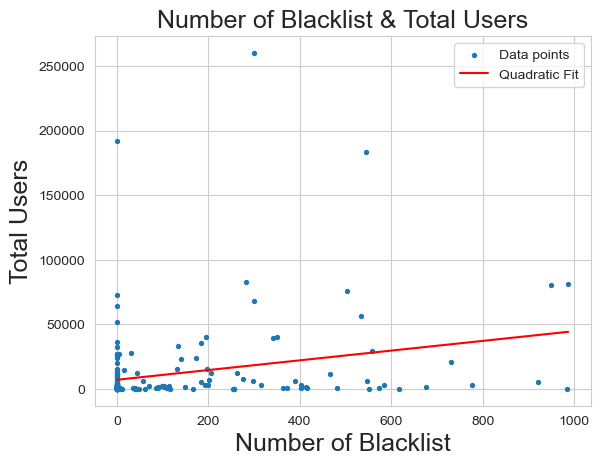

r2=0.06899162237903278
--------rules_num,active_month---------
Pearson correlation coefficient: 0.14083792144081747
P-value: 0.04895952463137996
Spearmanr correlation coefficient: 0.1307966331944746
P-value: 0.06765495563237965
Kendall-tau correlation coefficient: 0.09102467668532517
P-value: 0.06985107074593527


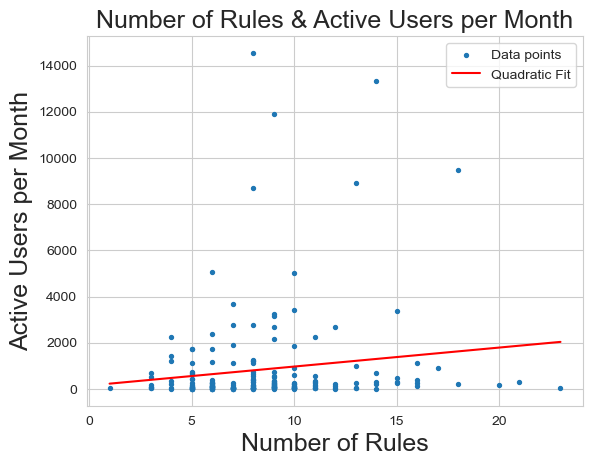

r2=0.019835320115769606
--------strictness,active_month---------
Pearson correlation coefficient: 0.19865102135041302
P-value: 0.005251336784879112
Spearmanr correlation coefficient: 0.13687252004045003
P-value: 0.05575173310741228
Kendall-tau correlation coefficient: 0.09084574849150642
P-value: 0.06145104095263797


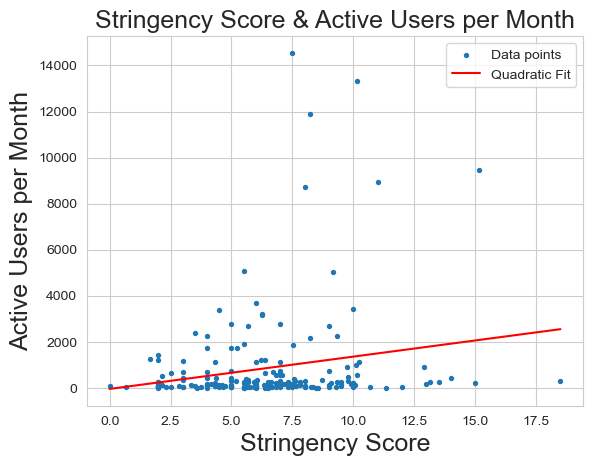

r2=0.03946222828356205
--------blacklist,active_month---------
Pearson correlation coefficient: 0.27413975447748407
P-value: 0.0001010069936075453
Spearmanr correlation coefficient: 0.2602288437707631
P-value: 0.00022999158353535548
Kendall-tau correlation coefficient: 0.19182953393410382
P-value: 0.00031507026978911214


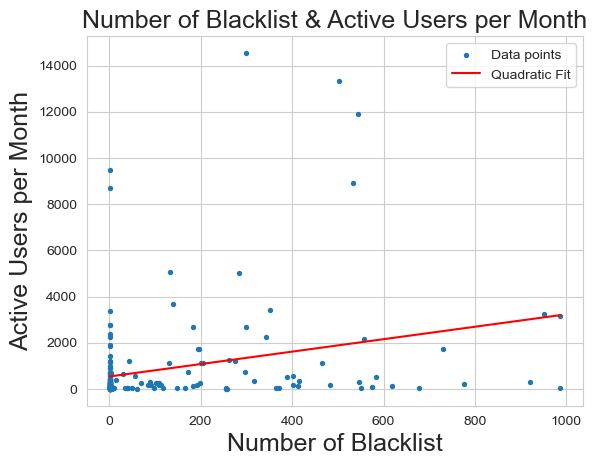

r2=0.07515260498497511
--------rules_num,total_posts---------
Pearson correlation coefficient: 0.1317202170108813
P-value: 0.06572210572592498
Spearmanr correlation coefficient: 0.1440418281183716
P-value: 0.043988231018653366
Kendall-tau correlation coefficient: 0.09840086108845413
P-value: 0.04977529535146705


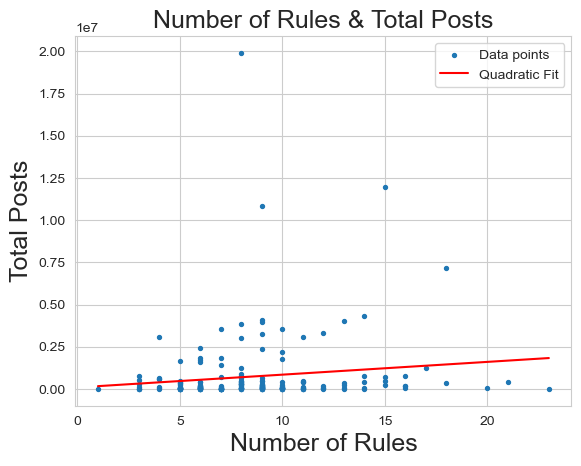

r2=0.017350215569393534
--------strictness,total_posts---------
Pearson correlation coefficient: 0.12028847245247729
P-value: 0.09307991816606613
Spearmanr correlation coefficient: 0.11784106057925982
P-value: 0.09997831757658855
Kendall-tau correlation coefficient: 0.07890024925692221
P-value: 0.10393694121789236


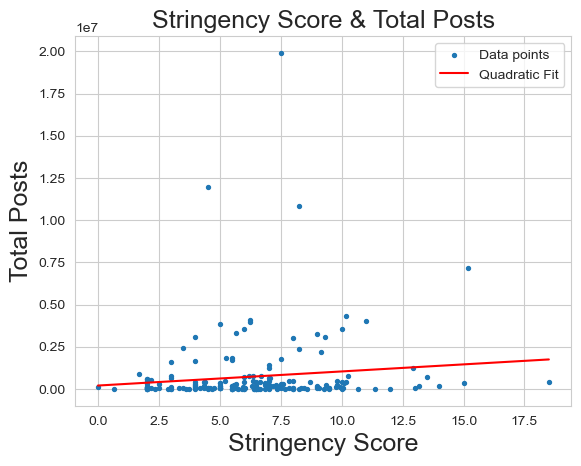

r2=0.014469316604950433
--------blacklist,total_posts---------
Pearson correlation coefficient: 0.23631727955216025
P-value: 0.0008541032872583866
Spearmanr correlation coefficient: 0.2843948608704442
P-value: 5.349748835042271e-05
Kendall-tau correlation coefficient: 0.21274141019390772
P-value: 6.344438045002524e-05


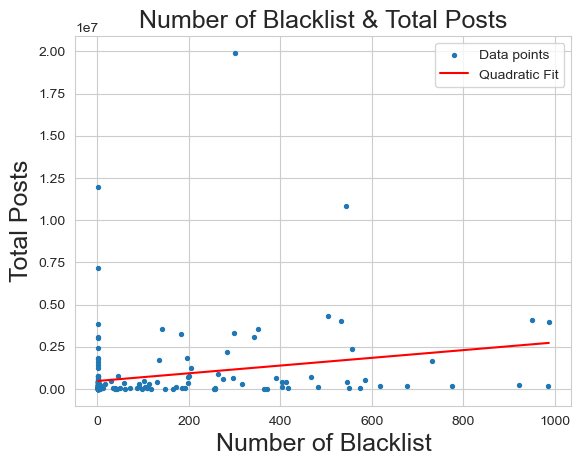

r2=0.05584585661493391


In [10]:
factors= ['rules_num','strictness','blacklist']
user_engagement=['active_rate','total_users','active_month','total_posts']

label_dict={
    'rules_num':'Number of Rules',
    'strictness': 'Stringency Score',
    'blacklist':'Number of Blacklist',
    'active_rate':'Active Users Rate',
    'total_users':'Total Users',
    'active_month':'Active Users per Month',
    'total_posts':'Total Posts'
}

for engagement in user_engagement:
    df=df_re_mastodon[np.isfinite(df_re_mastodon[engagement])].copy()
    for factor in factors:
        print(f"--------{factor},{engagement}---------")
        pearsonr_correlation(df[factor],df[engagement])
        spearmanr_correlation(df[factor],df[engagement])
        kendalltau_correlation(df[factor],df[engagement])
        xlabel=label_dict[factor]
        ylabel=label_dict[engagement]
    #     
        plot_scatter(df[factor],df[engagement],xlabel,ylabel,f'{xlabel} & {ylabel}')

----------active_rate---------
🔍 SHAP Summary Plot (feature importance):


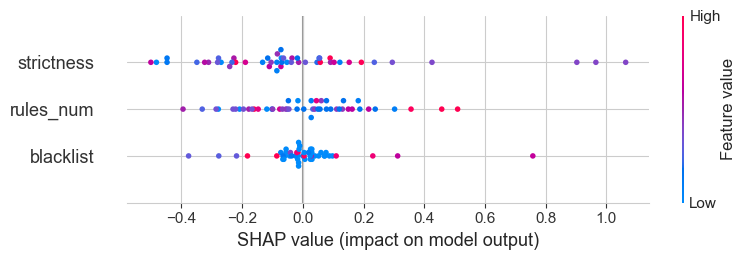

🔍 SHAP Interaction Summary Plot:


<Figure size 640x480 with 0 Axes>

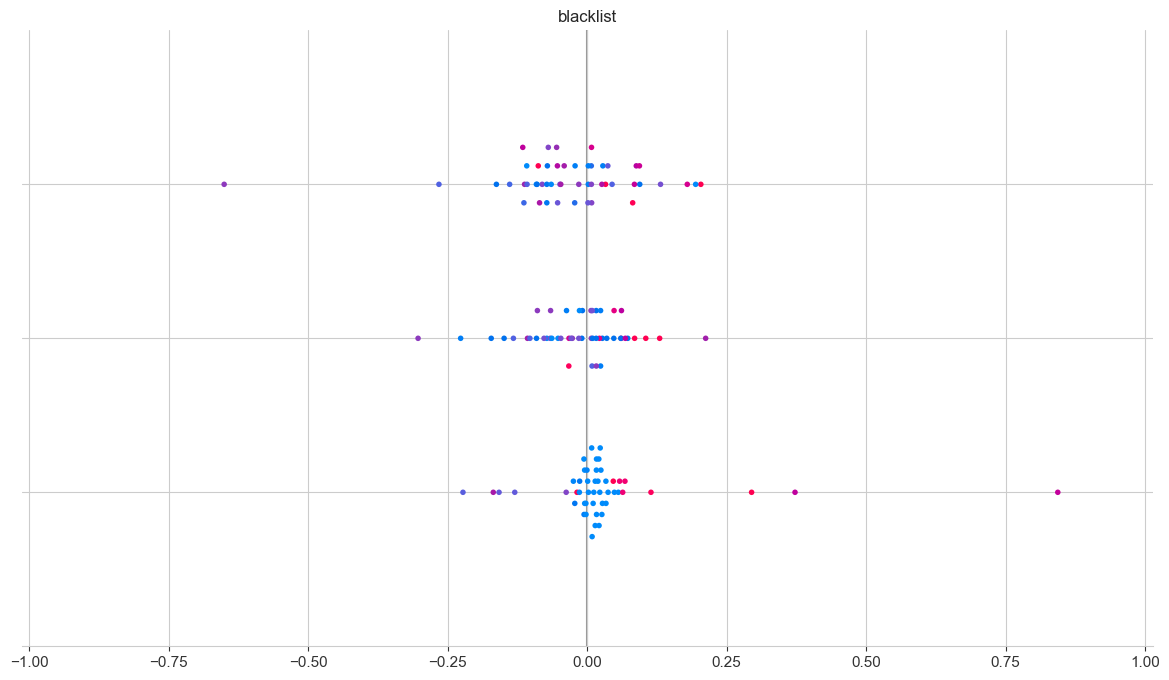

🔍 SHAP Dependence Plot for interaction: strictness × blacklist


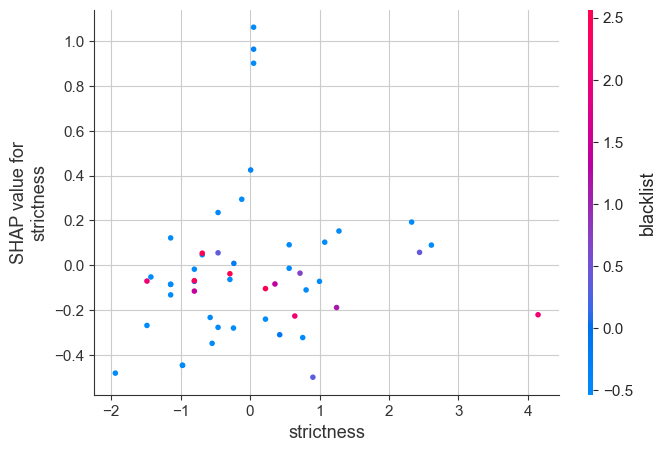

----------total_users---------
🔍 SHAP Summary Plot (feature importance):


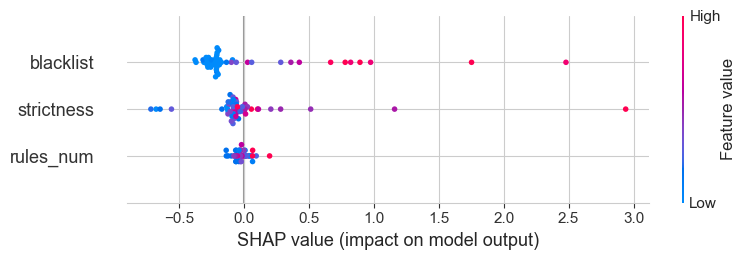

🔍 SHAP Interaction Summary Plot:


<Figure size 640x480 with 0 Axes>

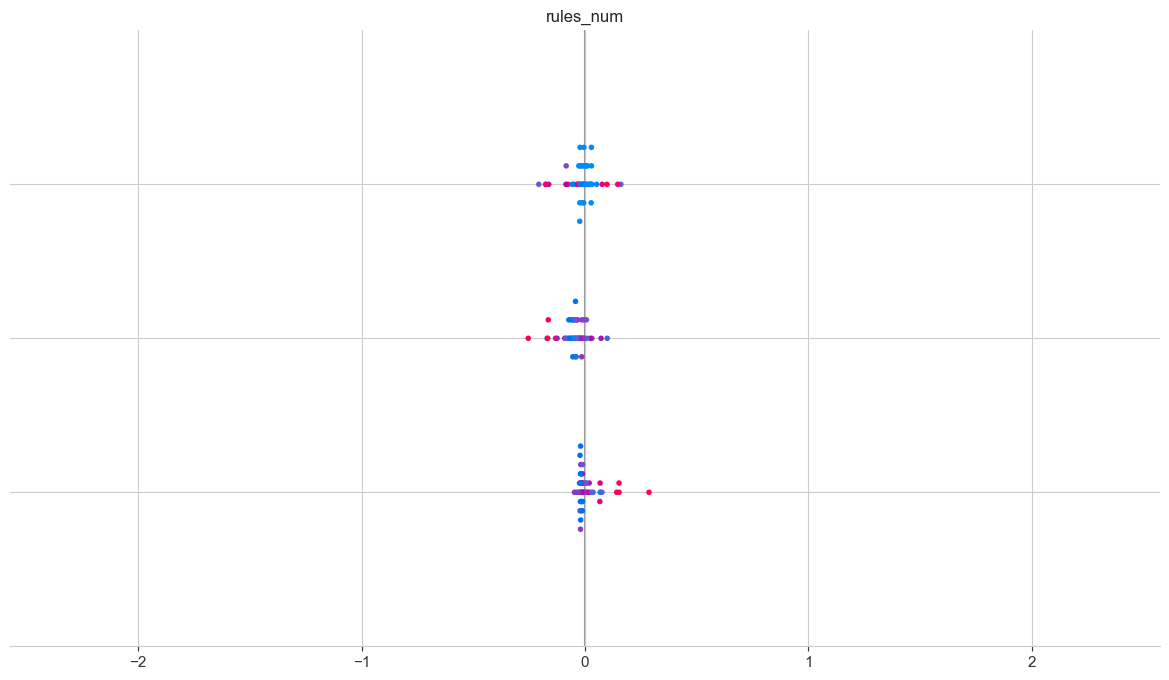

🔍 SHAP Dependence Plot for interaction: strictness × blacklist


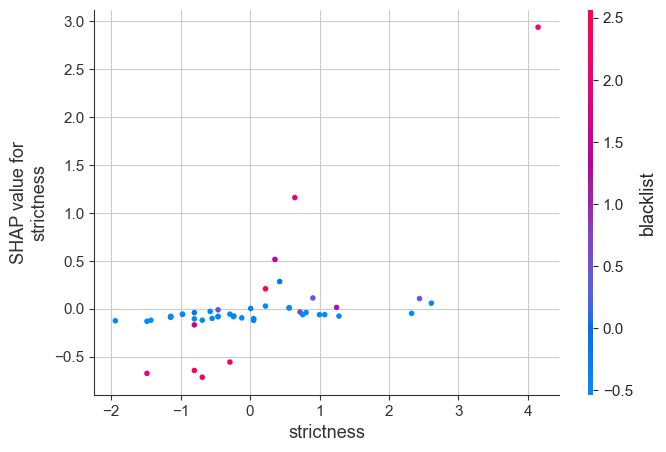

----------active_month---------
🔍 SHAP Summary Plot (feature importance):


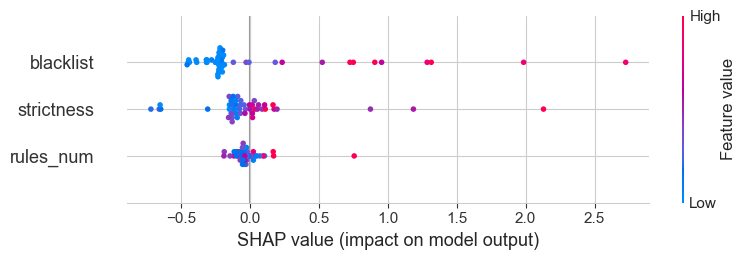

🔍 SHAP Interaction Summary Plot:


<Figure size 640x480 with 0 Axes>

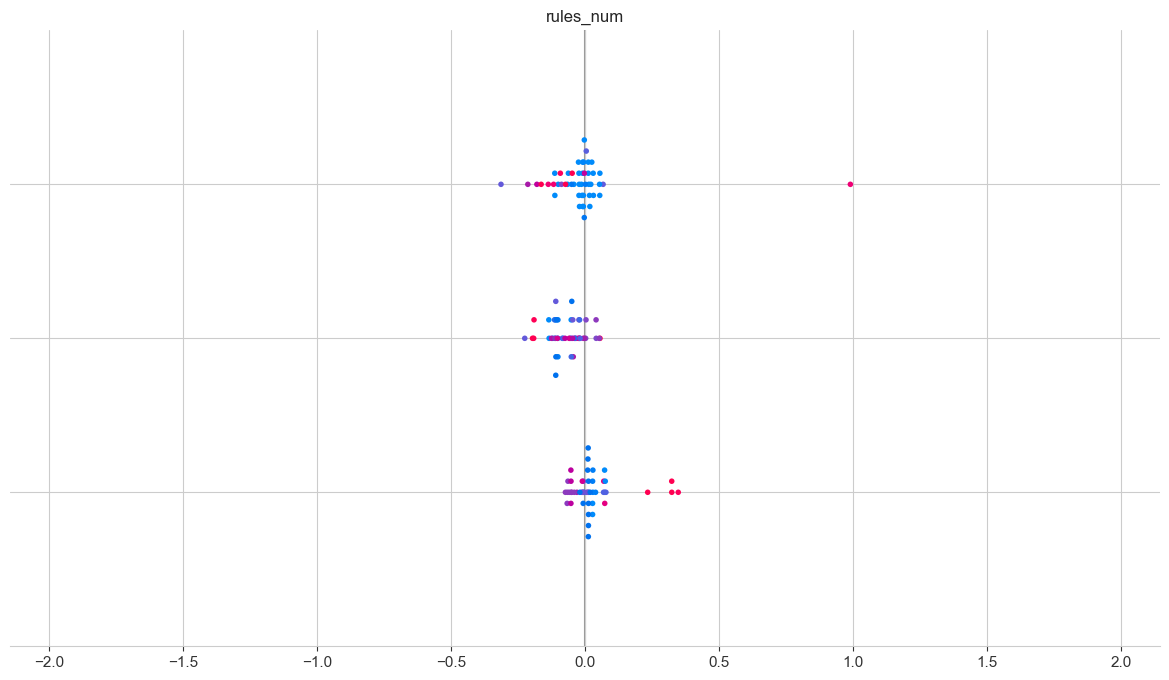

🔍 SHAP Dependence Plot for interaction: strictness × blacklist


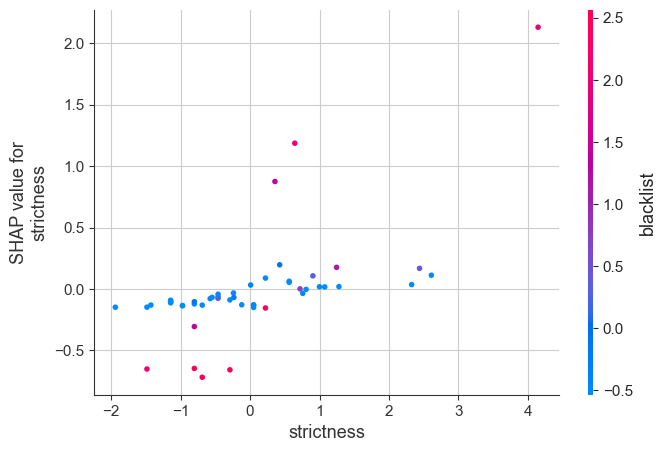

----------total_posts---------
🔍 SHAP Summary Plot (feature importance):


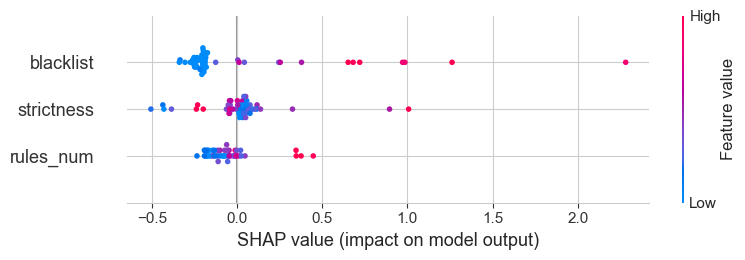

🔍 SHAP Interaction Summary Plot:


<Figure size 640x480 with 0 Axes>

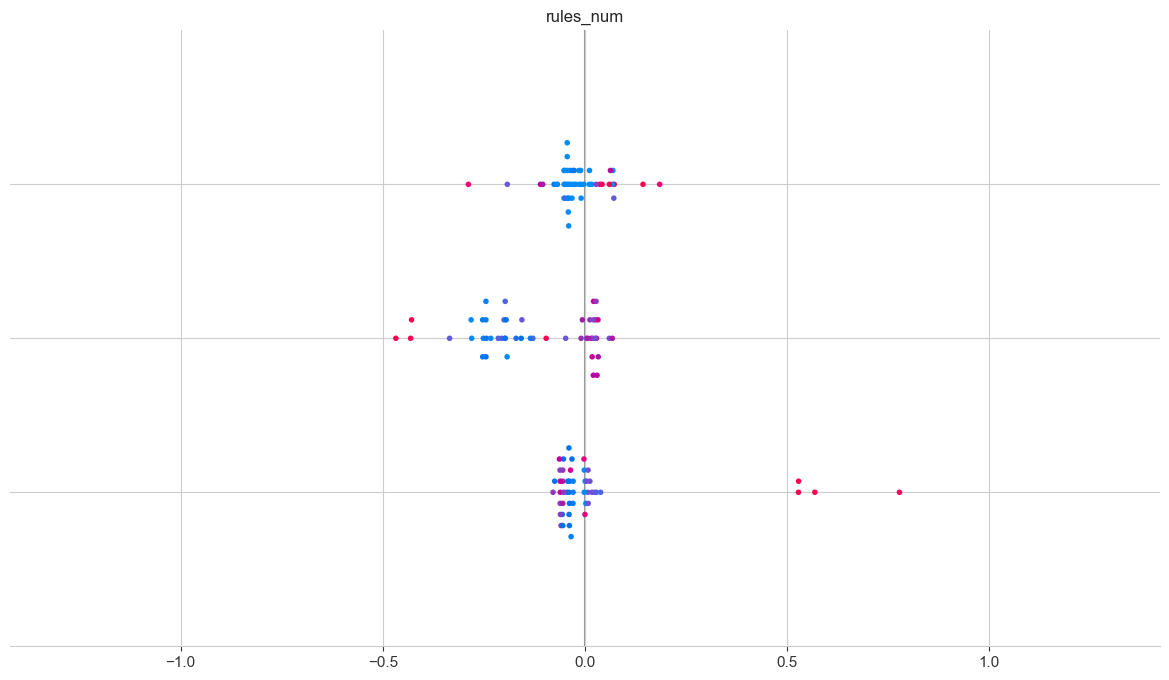

🔍 SHAP Dependence Plot for interaction: strictness × blacklist


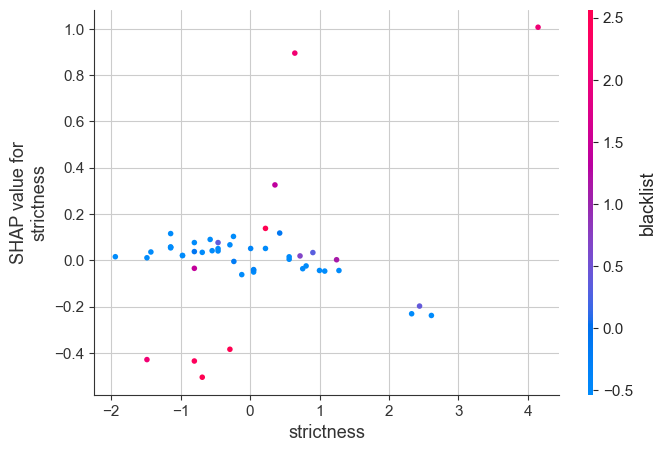

In [11]:
factors= ['rules_num','strictness','blacklist']
user_engagement=['active_rate','total_users','active_month','total_posts']

label_dict={
    'rules_num':'Number of Rules',
    'blacklist':'Number of Blacklist',
    'active_rate':'Active Users Rate',
    'total_users':'Total Users',
    'active_month':'Active Users per Month',
    'total_posts':'Total Posts',
    'strictness':'Strictness'
}

for engagement in user_engagement:
    df=df_re_mastodon[np.isfinite(df_re_mastodon[engagement])].copy()
    print(f'----------{engagement}---------')
    shap_analysis(df,factors,engagement,interaction_pair=('strictness','blacklist'))

## 3. Statistics of Mastodon

In [12]:
df_reddit = reddit.df
df_strictness_re=pd.read_csv("reddit_server_strictness.csv")
df_reddit=df_reddit.merge(df_strictness_re[['domain','strictness']],how='inner',on='domain')
df_reddit['rules_num']=df_reddit['rules'].apply(len)
df_reddit.head(5)

,domain,title,description,languages,total_users,active_month,over18,quarantine,is_restricted,moderators_count,rules,server_id,strictness,rules_num
0,AskReddit,Ask Reddit...,r/AskReddit is the place to ask and answer tho...,es,54701432,9986,False,False,False,32,[Rule 1 - Questions must be clear and direct a...,1,0.666667,11
1,NoStupidQuestions,No such thing as stupid questions,Ask away!\r\n\r\nDisclaimer: This is an anonym...,en,6021303,4872,False,False,False,27,[Top level comments must contain a genuine hum...,2,2.000000,9
2,BaldursGate3,Baldur's Gate 3,"A community all about Baldur's Gate III, the r...",en,3118378,1384,False,False,False,12,"[Be civil to one another., Respect the opinio...",3,3.000000,15
3,facepalm,now double verified,/r/facepalm - please sir can I have some more?,en,8145733,2345,False,False,False,24,"[No uncivil, bigoted, misogynist, misandrist, ...",4,0.000000,10
4,interestingasfuck,Interesting As Fuck,For anything truly interesting as fuck,en,13961838,4038,False,False,False,33,"[Posts MUST be INTERESTING AS FUCK!, No Polit...",5,1.000000,12


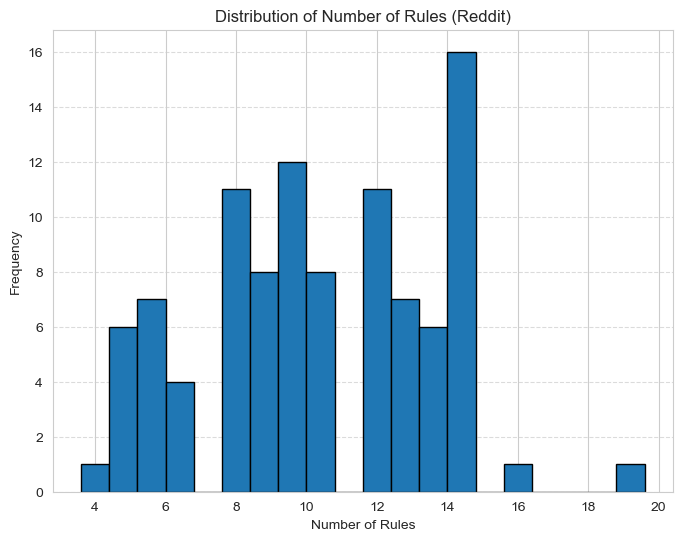

In [13]:
plot_distribution(df_reddit['rules_num'],'Number of Rules','Frequency','Distribution of Number of Rules (Reddit)', df_reddit['rules_num'].max())

### 3.1 Correlation Analysis

In [14]:
df_reddit['active_rate']=df_reddit['active_month']/df_reddit['total_users']

--------rules_num,active_rate---------
Pearson correlation coefficient: -0.01115202112362559
P-value: 0.9127620070755224
Spearmanr correlation coefficient: 0.058614089868644234
P-value: 0.564417936168969
Kendall-tau correlation coefficient: 0.04340304135718213
P-value: 0.5409672818574203


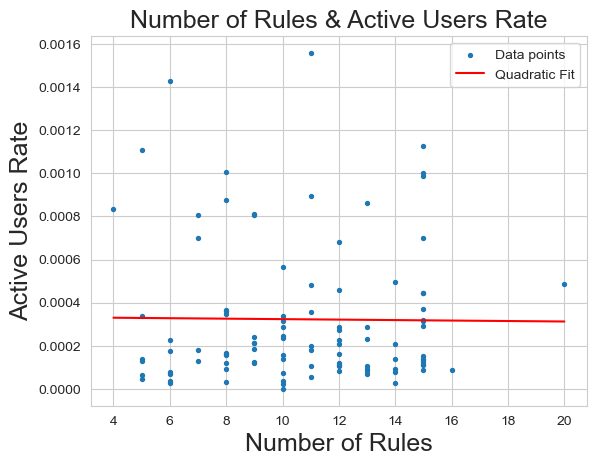

r2=0.0001243675751415596
--------strictness,active_rate---------
Pearson correlation coefficient: -0.04451894982413121
P-value: 0.6617130023608565
Spearmanr correlation coefficient: -0.00923445819712901
P-value: 0.9277176982771417
Kendall-tau correlation coefficient: -0.00046967204304846234
P-value: 0.9949531124682429


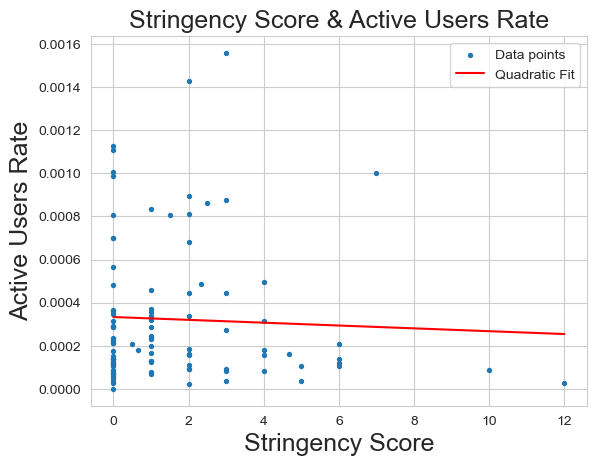

r2=0.0019819368934433923
--------moderators_count,active_rate---------
Pearson correlation coefficient: -0.05812809828593779
P-value: 0.5676570657277843
Spearmanr correlation coefficient: 0.02909641768792199
P-value: 0.7749627968267334
Kendall-tau correlation coefficient: 0.01633193538325224
P-value: 0.8133550701674181


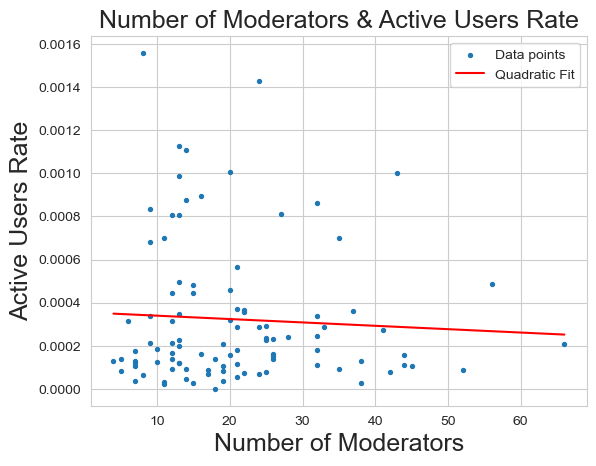

r2=0.0033788758103395766
--------rules_num,total_users---------
Pearson correlation coefficient: 0.04612670800472496
P-value: 0.6502840884707077
Spearmanr correlation coefficient: 0.14680261336929273
P-value: 0.1470626565302154
Kendall-tau correlation coefficient: 0.09695505258395411
P-value: 0.17204741256550815


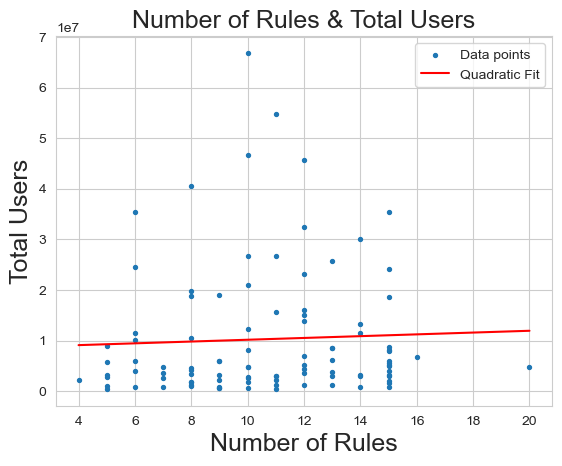

r2=0.0021276731913533187
--------strictness,total_users---------
Pearson correlation coefficient: 0.12433279766945077
P-value: 0.22014281877750166
Spearmanr correlation coefficient: 0.21033756463145706
P-value: 0.03664554067153332
Kendall-tau correlation coefficient: 0.15170406990465335
P-value: 0.04104283799643381


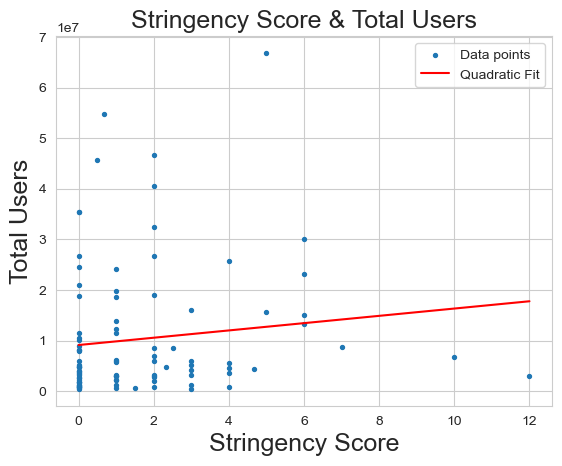

r2=0.015458644576312741
--------moderators_count,total_users---------
Pearson correlation coefficient: 0.4018349287823276
P-value: 3.746268801360894e-05
Spearmanr correlation coefficient: 0.40983851995230036
P-value: 2.5238882664878e-05
Kendall-tau correlation coefficient: 0.2839244151242313
P-value: 4.051766427560274e-05


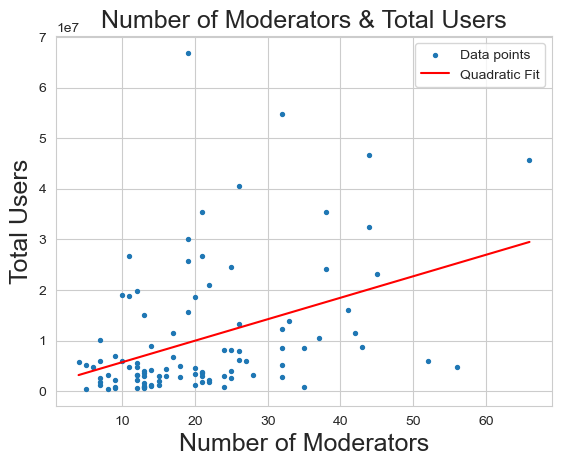

r2=0.16147130998949832
--------rules_num,active_month---------
Pearson correlation coefficient: 0.18951087301905226
P-value: 0.060282104292807004
Spearmanr correlation coefficient: 0.18807802024331505
P-value: 0.062285224687756394
Kendall-tau correlation coefficient: 0.1280761735167442
P-value: 0.07128579675787651


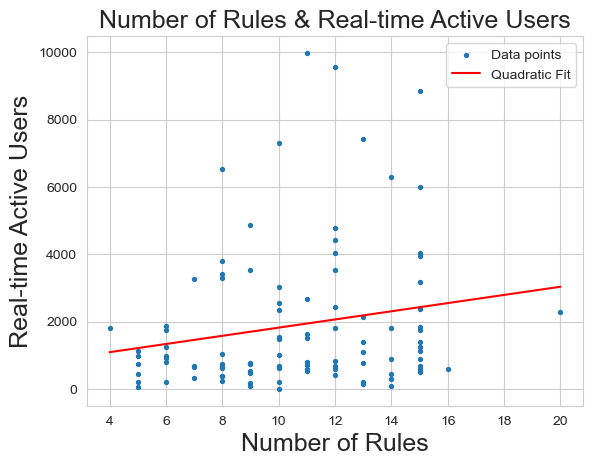

r2=0.03591437099244299
--------strictness,active_month---------
Pearson correlation coefficient: 0.11792243824280618
P-value: 0.2450433057074598
Spearmanr correlation coefficient: 0.2067781810841071
P-value: 0.04002050477889431
Kendall-tau correlation coefficient: 0.1526748901049091
P-value: 0.03980530926553722


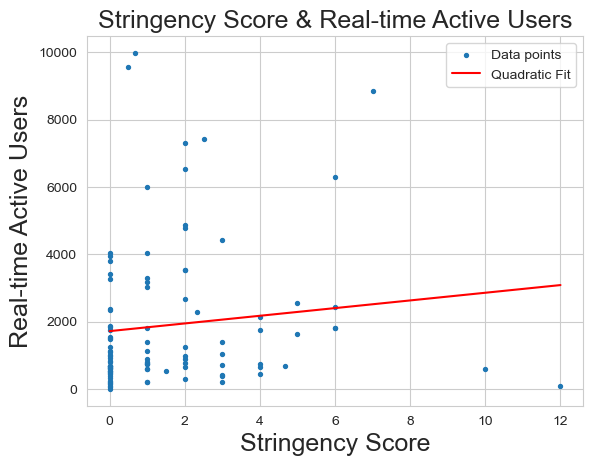

r2=0.013905701441128349
--------moderators_count,active_month---------
Pearson correlation coefficient: 0.485080985958779
P-value: 3.6106044606079516e-07
Spearmanr correlation coefficient: 0.4563429892390285
P-value: 2.062294700541584e-06
Kendall-tau correlation coefficient: 0.3204232538967989
P-value: 3.6349359590124897e-06


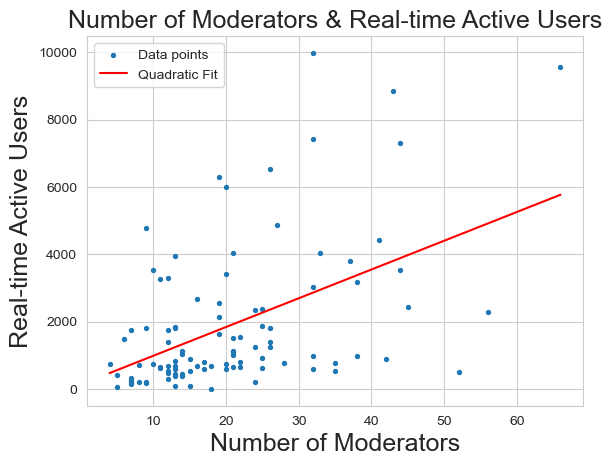

r2=0.235303562938741


In [15]:
factors= ['rules_num','strictness','moderators_count']
user_engagement=['active_rate','total_users','active_month']

label_dict={
    'rules_num':'Number of Rules',
    'blacklist':'Number of Blacklist',
    'active_rate':'Active Users Rate',
    'total_users':'Total Users',
    'active_month':'Real-time Active Users',
    'moderators_count':'Number of Moderators',
    'strictness':'Stringency Score'
}

for engagement in user_engagement:
    for factor in factors:
        print(f"--------{factor},{engagement}---------")
        pearsonr_correlation(df_reddit[factor],df_reddit[engagement])
        spearmanr_correlation(df_reddit[factor],df_reddit[engagement])
        kendalltau_correlation(df_reddit[factor],df_reddit[engagement])
        xlabel=label_dict[factor]
        ylabel=label_dict[engagement]
    #     
        plot_scatter(df_reddit[factor],df_reddit[engagement],xlabel,ylabel,f'{xlabel} & {ylabel}')

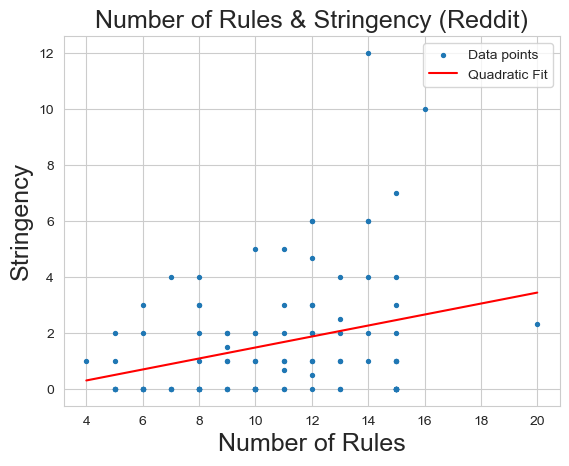

r2=0.08745356173713537
Spearmanr correlation coefficient: 0.258955309727825
P-value: 0.009649097073302729
Pearson correlation coefficient: 0.29572548374655705
P-value: 0.0029602775957457013


In [16]:
plot_scatter(df_reddit['rules_num'],df_reddit['strictness'],'Number of Rules','Stringency',f'Number of Rules & Stringency (Reddit)')
spearmanr_correlation(df_reddit['rules_num'],df_reddit['strictness'])
pearsonr_correlation(df_reddit['rules_num'],df_reddit['strictness'])

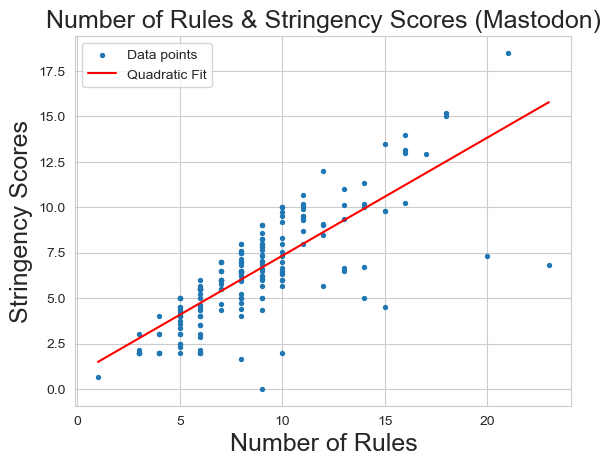

r2=0.6189432649770725
Spearmanr correlation coefficient: 0.8140714866834142
P-value: 1.152748650340311e-47
Pearson correlation coefficient: 0.7867294738199861
P-value: 1.6454915464254387e-42


In [17]:
plot_scatter(df_re_mastodon['rules_num'],df_re_mastodon['strictness'],'Number of Rules','Stringency Scores',f'Number of Rules & Stringency Scores (Mastodon)')
spearmanr_correlation(df_re_mastodon['rules_num'],df_re_mastodon['strictness'])
pearsonr_correlation(df_re_mastodon['rules_num'],df_re_mastodon['strictness'])

--------active_rate---------
🔍 SHAP Summary Plot (feature importance):


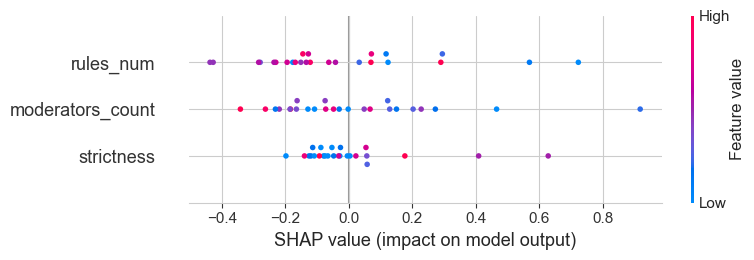

🔍 SHAP Interaction Summary Plot:


<Figure size 640x480 with 0 Axes>

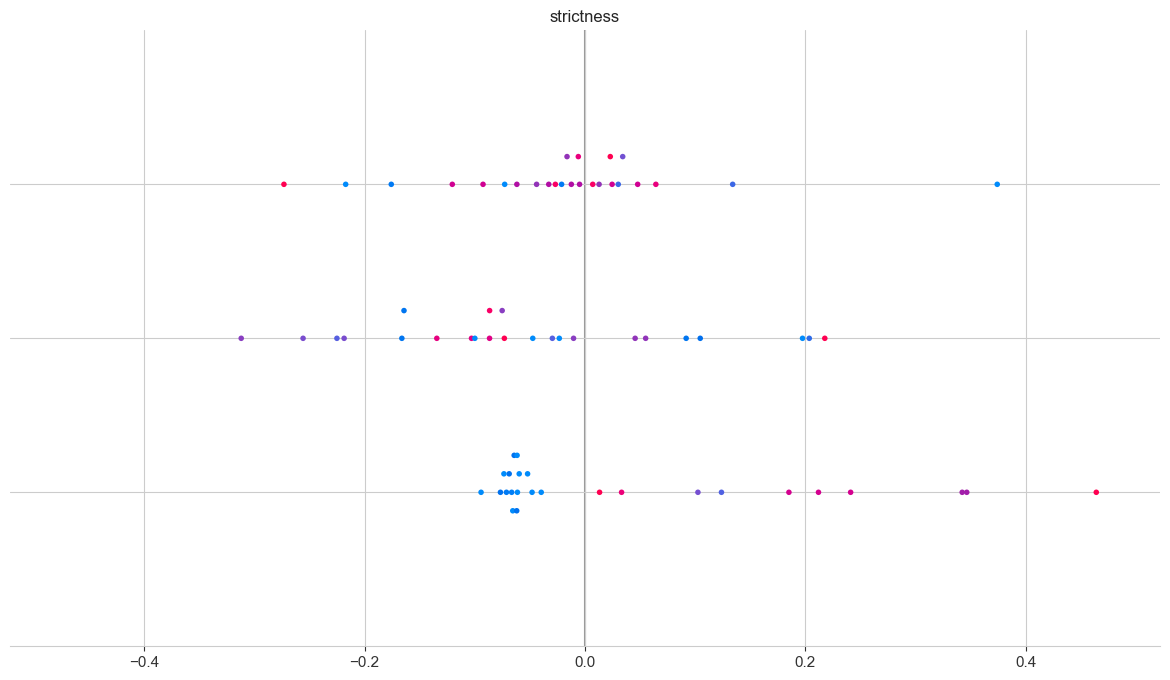

--------total_users---------
🔍 SHAP Summary Plot (feature importance):


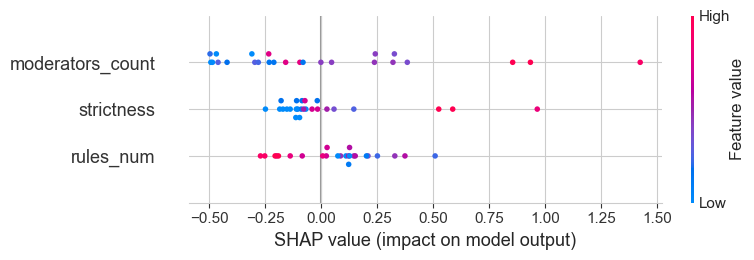

🔍 SHAP Interaction Summary Plot:


<Figure size 640x480 with 0 Axes>

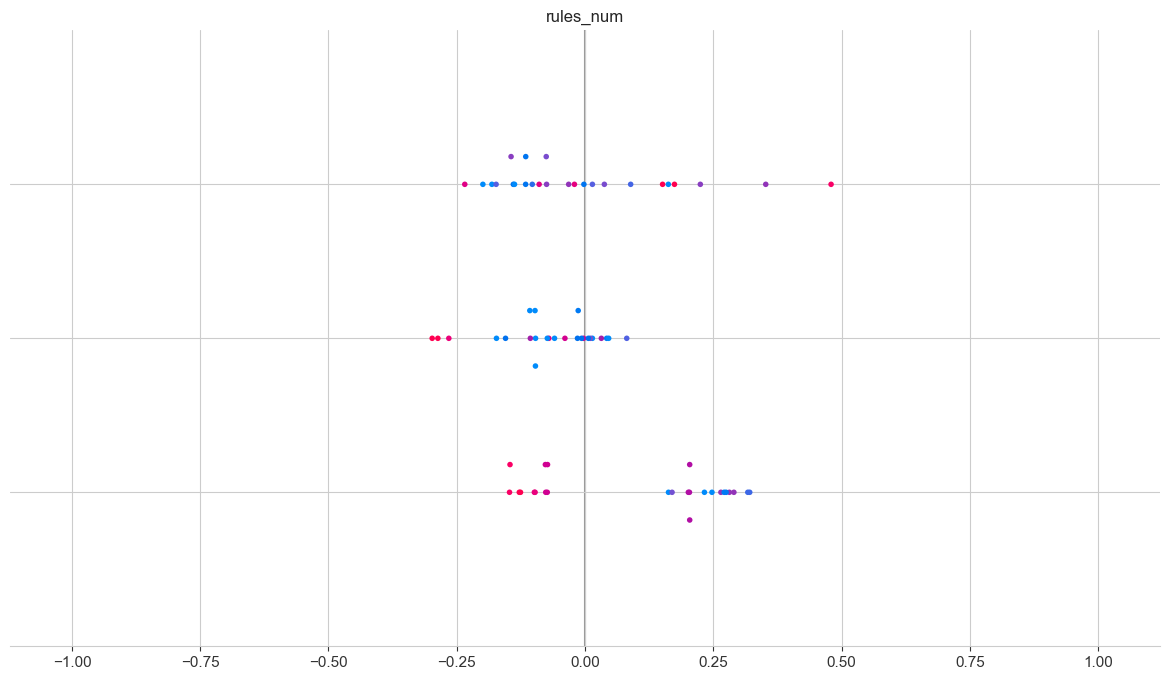

--------active_month---------
🔍 SHAP Summary Plot (feature importance):


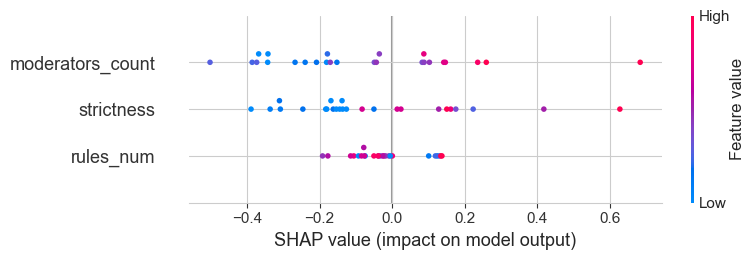

🔍 SHAP Interaction Summary Plot:


<Figure size 640x480 with 0 Axes>

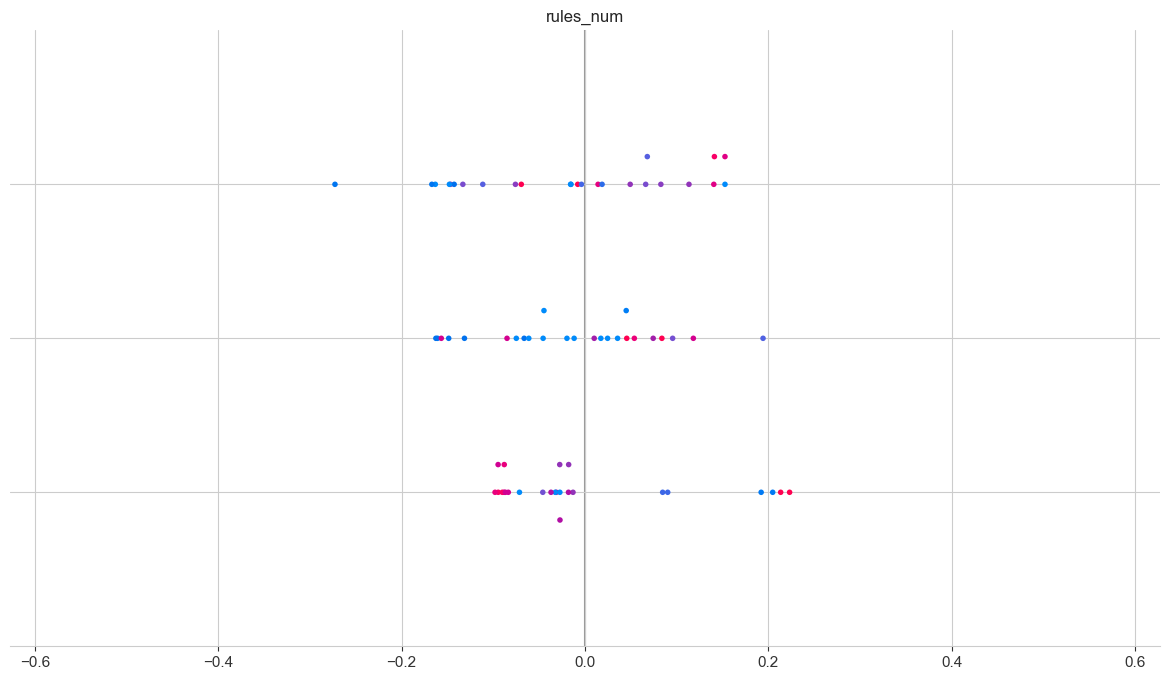

In [18]:
factors= ['rules_num','strictness','moderators_count']
user_engagement=['active_rate','total_users','active_month']

label_dict={
    'rules_num':'Number of Rules',
    'blacklist':'Number of Blacklist',
    'active_rate':'Active Users Rate',
    'total_users':'Total Users',
    'active_month':'Active Users per Month',
    'moderators_count':'Number of Moderators',
    'strictness':'Strictness'
}

for engagement in user_engagement:
    print(f"--------{engagement}---------")
    shap_analysis(df_reddit,factors,engagement)

## 4. Comparison Between Mastodon & Reddit

In [19]:
user_engagement=['active_rate','total_users','active_month']

for engagement in user_engagement:
    df=df_re_mastodon[np.isfinite(df_re_mastodon[engagement])].copy()
    print(f"--------rules_num,{engagement}---------")
    bootstrap_spearman_diff(df['rules_num'].values,df[engagement].values,df_reddit['rules_num'].values,df_reddit[engagement].values)
    

--------rules_num,active_rate---------


100%|██████████| 10000/10000 [00:45<00:00, 217.79it/s]


Observed Spearman r1: 0.0486
Observed Spearman r2: 0.0586
Observed difference: -0.0100
Bootstrap p-value: 0.9363
--------rules_num,total_users---------


100%|██████████| 10000/10000 [01:04<00:00, 156.07it/s]


Observed Spearman r1: 0.0965
Observed Spearman r2: 0.1468
Observed difference: -0.0503
Bootstrap p-value: 0.7005
--------rules_num,active_month---------


100%|██████████| 10000/10000 [00:57<00:00, 173.27it/s]


Observed Spearman r1: 0.1308
Observed Spearman r2: 0.1881
Observed difference: -0.0573
Bootstrap p-value: 0.6641


In [20]:
user_engagement=['active_rate','total_users','active_month']

for engagement in user_engagement:
    df=df_re_mastodon[np.isfinite(df_re_mastodon[engagement])].copy()
    print(f"--------rules_num,{engagement}---------")
    bootstrap_spearman_diff(df['strictness'].values,df[engagement].values,df_reddit['strictness'].values,df_reddit[engagement].values)
    

--------rules_num,active_rate---------


100%|██████████| 10000/10000 [01:03<00:00, 157.51it/s]


Observed Spearman r1: 0.0772
Observed Spearman r2: -0.0092
Observed difference: 0.0865
Bootstrap p-value: 0.5761
--------rules_num,total_users---------


100%|██████████| 10000/10000 [01:08<00:00, 145.24it/s]


Observed Spearman r1: 0.0887
Observed Spearman r2: 0.2103
Observed difference: -0.1216
Bootstrap p-value: 0.5106
--------rules_num,active_month---------


100%|██████████| 10000/10000 [01:18<00:00, 126.82it/s]

Observed Spearman r1: 0.1369
Observed Spearman r2: 0.2068
Observed difference: -0.0699
Bootstrap p-value: 0.6188


In [21]:
user_engagement=['active_rate','total_users','active_month','total_posts']

for engagement in user_engagement:
    df=df_re_mastodon[np.isfinite(df_re_mastodon[engagement])].copy()
    print(f"--------rules_num,{engagement}---------")
    bootstrap_spearman_diff(df['rules_num'].values,df[engagement].values,df['strictness'].values,df[engagement].values)
    

--------rules_num,active_rate---------


100%|██████████| 10000/10000 [01:18<00:00, 128.13it/s]


Observed Spearman r1: 0.0486
Observed Spearman r2: 0.0772
Observed difference: -0.0286
Bootstrap p-value: 0.7723
--------rules_num,total_users---------


100%|██████████| 10000/10000 [01:08<00:00, 146.89it/s]


Observed Spearman r1: 0.0965
Observed Spearman r2: 0.0887
Observed difference: 0.0077
Bootstrap p-value: 0.9352
--------rules_num,active_month---------


100%|██████████| 10000/10000 [01:22<00:00, 120.64it/s]


Observed Spearman r1: 0.1308
Observed Spearman r2: 0.1369
Observed difference: -0.0061
Bootstrap p-value: 0.9493
--------rules_num,total_posts---------


100%|██████████| 10000/10000 [01:22<00:00, 121.51it/s]

Observed Spearman r1: 0.1440
Observed Spearman r2: 0.1178
Observed difference: 0.0262
Bootstrap p-value: 0.7997


In [22]:
user_engagement=['active_rate','total_users','active_month','total_posts']

for engagement in user_engagement:
    df=df_re_mastodon[np.isfinite(df_re_mastodon[engagement])].copy()
    print(f"--------rules_num,{engagement}---------")
    bootstrap_spearman_diff(df['blacklist'].values,df[engagement].values,df['strictness'].values,df[engagement].values)

--------rules_num,active_rate---------


100%|██████████| 10000/10000 [01:16<00:00, 131.21it/s]


Observed Spearman r1: 0.0003
Observed Spearman r2: 0.0772
Observed difference: -0.0769
Bootstrap p-value: 0.5562
--------rules_num,total_users---------


100%|██████████| 10000/10000 [00:57<00:00, 174.58it/s]


Observed Spearman r1: 0.2223
Observed Spearman r2: 0.0887
Observed difference: 0.1336
Bootstrap p-value: 0.5021
--------rules_num,active_month---------


100%|██████████| 10000/10000 [01:18<00:00, 127.25it/s]


Observed Spearman r1: 0.2602
Observed Spearman r2: 0.1369
Observed difference: 0.1234
Bootstrap p-value: 0.5042
--------rules_num,total_posts---------


100%|██████████| 10000/10000 [01:21<00:00, 122.90it/s]


Observed Spearman r1: 0.2844
Observed Spearman r2: 0.1178
Observed difference: 0.1666
Bootstrap p-value: 0.4978


In [32]:
user_engagement=['total_users','active_month']

for engagement in user_engagement:
    print(f"--------rules_num,{engagement}---------")
    bootstrap_kendall_diff(df_reddit['moderators_count'].values,df_reddit[engagement].values,df_reddit['strictness'].values,df_reddit[engagement].values,n_iter=3000,random_state=42)

--------rules_num,total_users---------


Bootstrapping: 100%|██████████| 3000/3000 [00:01<00:00, 2876.46it/s]


Observed Kendall tau1: 0.2839
Observed Kendall tau2: 0.1517
Observed difference: 0.1322
Bootstrap p-value: 0.4937
--------rules_num,active_month---------


Bootstrapping: 100%|██████████| 3000/3000 [00:00<00:00, 3115.05it/s]

Observed Kendall tau1: 0.3204
Observed Kendall tau2: 0.1527
Observed difference: 0.1677
Bootstrap p-value: 0.5087


In [81]:
for engagement in user_engagement:
    df=df_re_mastodon[np.isfinite(df_re_mastodon[engagement])].copy()
    print(f"--------rules_num,{engagement}---------")
    bootstrap_spearman_diff(df['strictness'],df[engagement],df_reddit['strictness'],df_reddit[engagement])

--------rules_num,active_rate---------
r1 = 0.077, r2 = -0.009
z = 0.694, p = 0.4879
--------rules_num,total_users---------
r1 = 0.089, r2 = 0.210
z = -0.997, p = 0.3186
--------rules_num,active_month---------
r1 = 0.137, r2 = 0.207
z = -0.577, p = 0.5639


In [82]:
for engagement in user_engagement:
    df=df_re_mastodon[np.isfinite(df_re_mastodon[engagement])].copy()
    print(f"--------rules_num,{engagement}---------")
    bootstrap_spearman_diff(df['strictness'],df[engagement],df_reddit['strictness'],df_reddit[engagement])

--------rules_num,active_rate---------
r1 = 0.033, r2 = -0.045
z = 0.622, p = 0.5339
--------rules_num,total_users---------
r1 = 0.170, r2 = 0.124
z = 0.371, p = 0.7105
--------rules_num,active_month---------
r1 = 0.199, r2 = 0.118
z = 0.663, p = 0.5071


## 5. Topic Correlation Analysis

In [147]:
df_lgbta=pd.read_csv("lgbtq_safe_servers.csv")
print(df_lgbta.head(5))

   server_id                                        description  Topic  \
0          6  hachyderm safe space lgbtqia blm primarily com...      2   
1         85  furry focused instance critters like bark lgbt...      2   
2         93  instance aimed techies engineers types within ...      2   
3        100  qaf queer folk sincerely invites lgbtqia commu...      2   
4        128  instance aimed within furry fandom though anyo...      2   

   Topic Count                  Topic Name  \
0           14  2_safe_lgbtqia_furry_lgbtq   
1           14  2_safe_lgbtqia_furry_lgbtq   
2           14  2_safe_lgbtqia_furry_lgbtq   
3           14  2_safe_lgbtqia_furry_lgbtq   
4           14  2_safe_lgbtqia_furry_lgbtq   

                                Topic Representation  \
0  ['safe', 'lgbtqia', 'furry', 'lgbtq', 'offer',...   
1  ['safe', 'lgbtqia', 'furry', 'lgbtq', 'offer',...   
2  ['safe', 'lgbtqia', 'furry', 'lgbtq', 'offer',...   
3  ['safe', 'lgbtqia', 'furry', 'lgbtq', 'offer',...  

Pearson correlation coefficient: 0.3077951655441914
P-value: 0.2843687613607515
Spearmanr correlation coefficient: -0.0770077473690976
P-value: 0.7935833915550878
Kendall-tau correlation coefficient: -0.022099784804393195
P-value: 0.9126836080591444


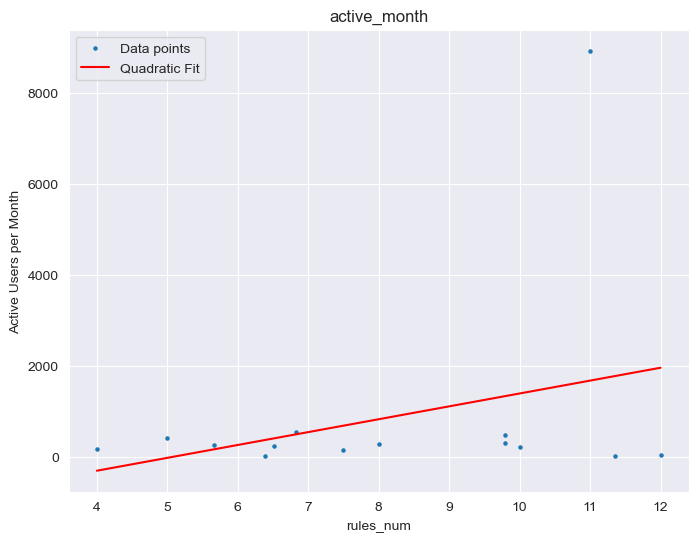

r2=0.09473786393237649


In [148]:
df_lgbta=df_lgbta.merge(df_re_mastodon[['domain','rules_num','strictness']],on='domain',how='left')

pearsonr_correlation(df_lgbta['strictness'],df_lgbta['active_month'])
spearmanr_correlation(df_lgbta['strictness'],df_lgbta['active_month'])
kendalltau_correlation(df_lgbta['strictness'],df_lgbta['active_month'])
xlabel='rules_num'
ylabel=label_dict['active_month']
plot_scatter(df_lgbta['strictness'],df_lgbta['active_month'],xlabel,ylabel,'active_month')

Pearson correlation coefficient: 0.321025114866448
P-value: 0.2630862154570066
Spearmanr correlation coefficient: 0.19361947909944544
P-value: 0.5071800042949804
Kendall-tau correlation coefficient: 0.19889806323953876
P-value: 0.32369755479615125


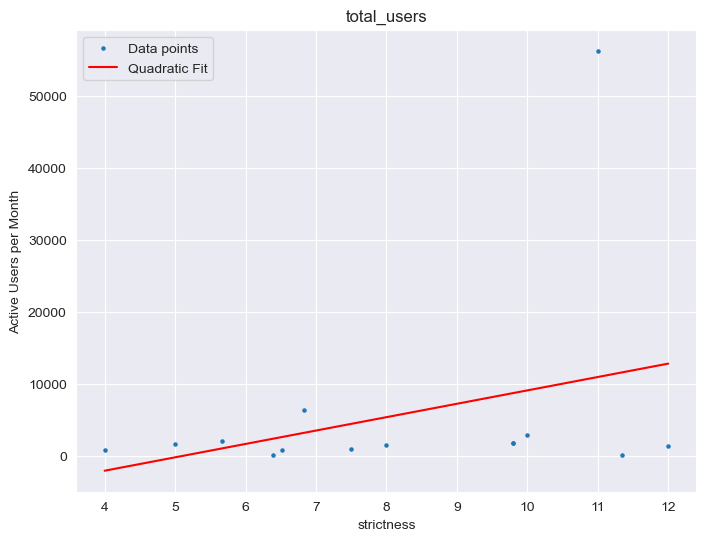

r2=0.10305712437501635


In [149]:
pearsonr_correlation(df_lgbta['strictness'],df_lgbta['total_users'])
spearmanr_correlation(df_lgbta['strictness'],df_lgbta['total_users'])
kendalltau_correlation(df_lgbta['strictness'],df_lgbta['total_users'])
xlabel='strictness'
ylabel=label_dict['active_month']
plot_scatter(df_lgbta['strictness'],df_lgbta['total_users'],xlabel,ylabel,'total_users')

In [150]:
fisher_z_test( zscore(df_re_mastodon['strictness']), zscore(df_re_mastodon['active_month']), zscore(df_lgbta['strictness']), zscore(df_lgbta['active_month']))

r1 = 0.137, r2 = -0.077
z = 0.693, p = 0.4882


In [87]:
df_strictness=pd.read_csv("mastodon_server_strictness.csv")
print(df_strictness.head(5))

   server_id  strictness            domain             title  \
0          0    4.866667   mastodon.social          Mastodon   
1          1    7.500000      mstdn.social        Mastodon 🐘   
2          2   10.166667  infosec.exchange  Infosec Exchange   
3          3    8.238095            mas.to            mas.to   
4          4   15.166667    mastodon.world          Mastodon   

                                         description  active_month languages  \
0  The original server operated by the Mastodon g...        327503    ['en']   
1  A general-purpose Mastodon server with a 500 c...         14546    ['en']   
2  A Mastodon instance for info/cyber security-mi...         13319    ['en']   
3  Hello! mas.to is a fast, up-to-date and fun Ma...         11889    ['en']   
4         Generic Mastodon server for anyone to use.          9472    ['en']   

                                               rules  total_users  
0  [{'id': '1', 'text': 'Sexually explicit or vio...      2711879 

In [88]:
idx_max = df_strictness['active_month'].idxmax()
df_strictness= df_strictness.drop(idx_max).copy()

Pearson correlation coefficient: 0.16967664135515437
P-value: 0.01742834228681549
Spearmanr correlation coefficient: 0.08872980075018617
P-value: 0.21619388912732032


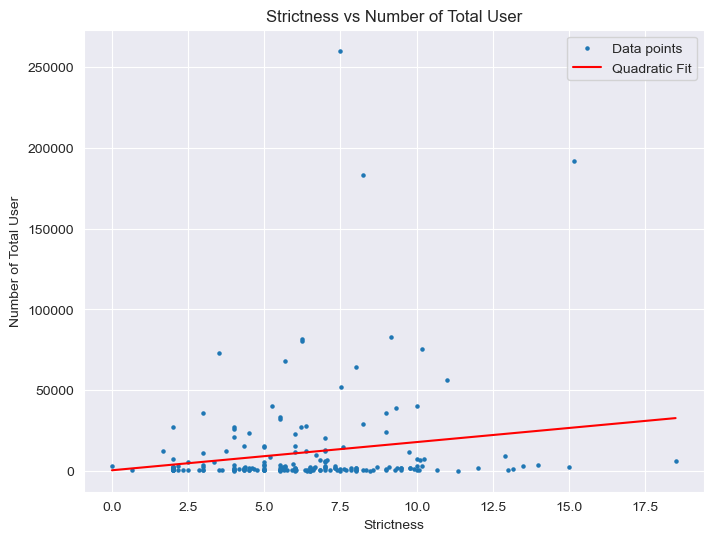

r2=0.02879016262156564


In [89]:

pearsonr_correlation(df_strictness['strictness'],df_strictness['total_users'])
spearmanr_correlation(df_strictness['strictness'],df_strictness['total_users'])
xlabel='Strictness'
ylabel='Number of Total User'
plot_scatter(df_strictness['strictness'],df_strictness['total_users'],xlabel,ylabel,'Strictness vs Number of Total User')

Spearmanr correlation coefficient: 0.13687252004045003
P-value: 0.05575173310741228
Pearson correlation coefficient: 0.19865102135041302
P-value: 0.005251336784879112


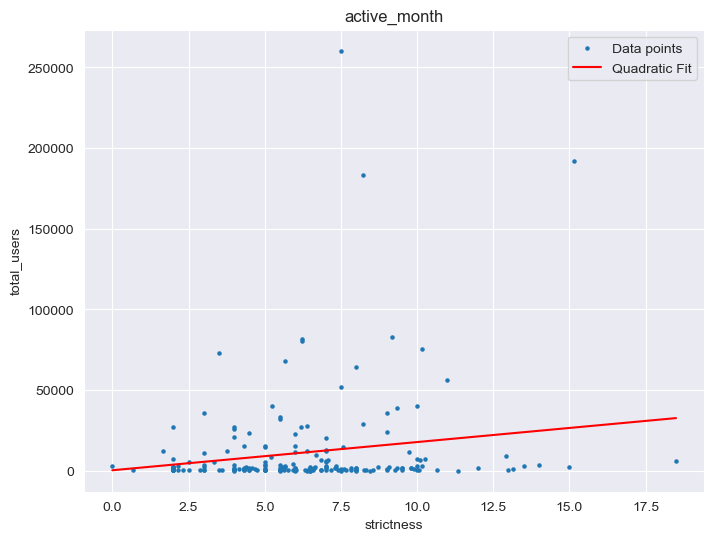

r2=0.02879016262156564


In [90]:
spearmanr_correlation(df_strictness['strictness'],df_strictness['active_month'])
pearsonr_correlation(df_strictness['strictness'],df_strictness['active_month'])
xlabel='strictness'
ylabel='total_users'
plot_scatter(df_strictness['strictness'],df_strictness['total_users'],xlabel,ylabel,'active_month')

In [ ]:
pearsonr_correlation(df_strictness['strictness'],df_strictness['active_month'])
xlabel='strictness'
ylabel='total_users'
plot_scatter(df_strictness['strictness'],df_strictness['total_users'],xlabel,ylabel,'active_month')

In [24]:
lgbt_strictness=df_lgbta.merge(df_strictness[['domain','strictness']],on='domain',how='left')

run_t_test(df_strictness['strictness'],lgbt_strictness['strictness'])

t = -2.524, p = 0.0229 → 显著差异


In [151]:
run_t_test(df_re_mastodon['strictness'],lgbt_strictness['strictness'])

t = -2.512, p = 0.0234 → 显著差异


In [152]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro

stat, p = shapiro(df_re_mastodon['strictness'].values)
print(f"Shapiro-Wilk 检验结果:")
print(f"W 统计量 = {stat:.4f}, p-value = {p:.4f}")

stat, p = shapiro(df_re_mastodon['rules_num'].values)
print(f"Shapiro-Wilk 检验结果:")
print(f"W 统计量 = {stat:.4f}, p-value = {p:.4f}")


stat, p = shapiro(df_re_mastodon['total_users'].values)
print(f"Shapiro-Wilk 检验结果:")
print(f"W 统计量 = {stat:.4f}, p-value = {p:.4f}")

stat, p = shapiro(df_re_mastodon[''].values)
print(f"Shapiro-Wilk 检验结果:")
print(f"W 统计量 = {stat:.4f}, p-value = {p:.4f}")

Shapiro-Wilk 检验结果:
W 统计量 = 0.9635, p-value = 0.0001
Shapiro-Wilk 检验结果:
W 统计量 = 0.9258, p-value = 0.0000
Shapiro-Wilk 检验结果:
W 统计量 = 0.3930, p-value = 0.0000


In [22]:
df_mastodon = mastodon.df
idx_max = df_mastodon['active_month'].idxmax()
df_re_mastodon = df_mastodon.drop(idx_max).copy()

In [23]:
spearmanr_correlation(df_re_mastodon['rules_num'],df_re_mastodon['active_month'])
spearmanr_correlation(df_re_mastodon['rules_num'],df_re_mastodon['total_users'])
spearmanr_correlation(df_re_mastodon['rules_num'],df_re_mastodon['total_posts'])

Spearmanr correlation coefficient: 0.1733947526817195
P-value: 0.0015936139203846635
Spearmanr correlation coefficient: 0.13673318325530642
P-value: 0.013052076298115917
Spearmanr correlation coefficient: 0.14949700321702028
P-value: 0.006595786339940512


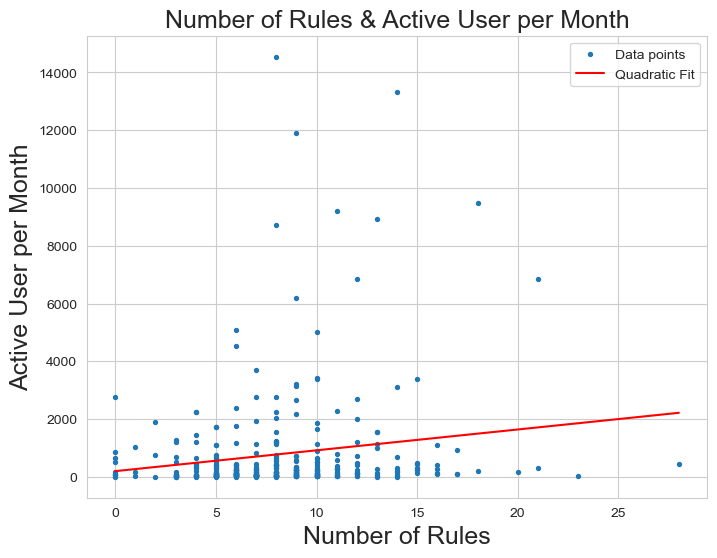

r2=0.02505578017326171


In [36]:
plot_scatter(df_re_mastodon['rules_num'],df_re_mastodon['active_month'],'Number of Rules','Active User per Month','Number of Rules & Active User per Month')

In [10]:
df_cluster=pd.read_csv("mastodon_clusters_descr.csv")
df_cluster_ma=df_re_mastodon.merge(df_cluster[['domain','Topic']],how='inner',on='domain')
print(df_cluster_ma.head(5))


             domain             title                              source_url  \
0      mstdn.social        Mastodon 🐘    https://github.com/mastodon/mastodon   
1  infosec.exchange  Infosec Exchange  https://github.com/glitch-soc/mastodon   
2            mas.to            mas.to    https://github.com/mastodon/mastodon   
3    mastodon.world          Mastodon    https://github.com/mastodon/mastodon   
4      hachyderm.io      Hachyderm.io    https://github.com/mastodon/mastodon   

                                         description  active_month languages  \
0  A general-purpose Mastodon server with a 500 c...         14546      [en]   
1  A Mastodon instance for info/cyber security-mi...         13319      [en]   
2  Hello! mas.to is a fast, up-to-date and fun Ma...         11889      [en]   
3         Generic Mastodon server for anyone to use.          9472      [en]   
4  Hachyderm is a safe space, LGBTQIA+ and BLM, p...          8937      [en]   

                                

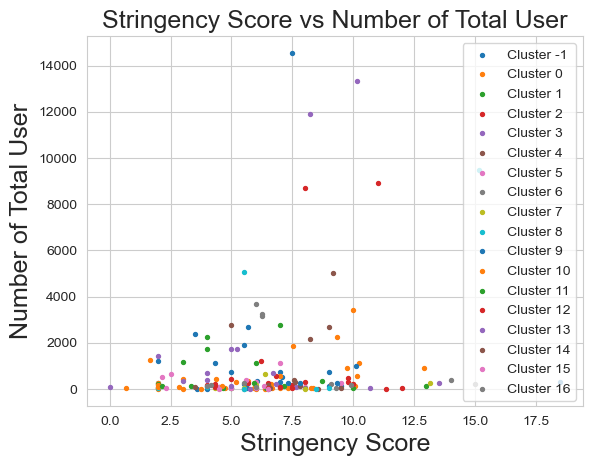

r2=0.039268113597579535


In [12]:
plot_scatter(df_cluster_ma['strictness'],df_cluster_ma['active_month'],'Stringency Score','Number of Total User','Stringency Score vs Number of Total User',df_cluster_ma['Topic'])

In [17]:
df_cluster=pd.read_csv("reddit_clusters_descr.csv")
df_cluster_re=df_reddit.merge(df_cluster[['domain','Topic']],how='inner',on='domain')
print(df_cluster_re.head(5))

                 domain                              title  \
0     NoStupidQuestions  No such thing as stupid questions   
1          BaldursGate3                    Baldur's Gate 3   
2              facepalm                now double verified   
3     interestingasfuck                Interesting As Fuck   
4  Damnthatsinteresting          Damn, that's interesting!   

                                         description languages  total_users  \
0  Ask away!\r\n\r\nDisclaimer: This is an anonym...        en      6021303   
1  A community all about Baldur's Gate III, the r...        en      3118378   
2     /r/facepalm - please sir can I have some more?        en      8145733   
3             For anything truly interesting as fuck        en     13961838   
4    For the most interesting things on the internet        en     19795678   

   active_month  over18  quarantine  is_restricted  moderators_count  \
0          4872   False       False          False                27   
1       

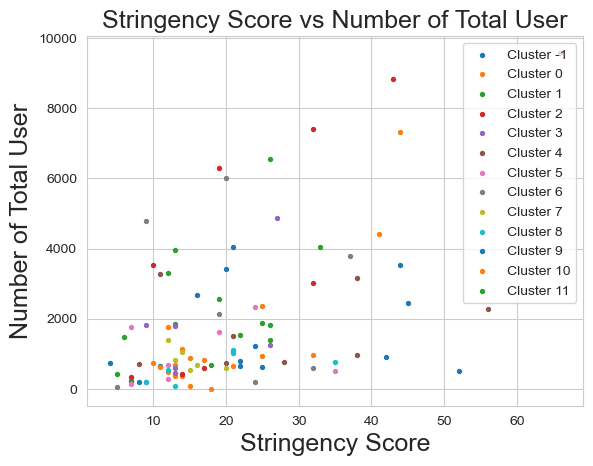

r2=0.2384247634654133


In [22]:
plot_scatter(df_cluster_re['moderators_count'],df_cluster_re['active_month'],'Stringency Score','Number of Total User','Stringency Score vs Number of Total User',df_cluster_re['Topic'])